<a href="https://colab.research.google.com/github/Digant-Parmar/Neural_network/blob/master/mnist_perdiction_form_sratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [73]:
data= pd.read_csv('/content/mnist_train.csv')

In [74]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data = np.array(data)




In [76]:

m,n = data.shape


np.random.shuffle(data)
print(m,n)



60000 785


In [77]:
print(m,n)

60000 785


In [78]:
train_data = data[0:int(0.8*m),:]
val_data = data[int(0.8*m):,:]

X_train = train_data[:,1:].T
X_train = X_train/255.0
Y_train = train_data[:,0]
X_val = val_data[:,1:].T
X_val = X_val/255.0
Y_val = val_data[:,0]

In [79]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(784, 48000)
(48000,)
(784, 12000)
(12000,)


In [90]:
from binascii import b2a_base64
def init_parameters():
  W1 = np.random.rand(10,784) - 0.5
  B1 = np.random.rand(10,1) - 0.5
  W2 = np.random.rand(10,10) - 0.5
  B2 = np.random.rand(10,1) - 0.5
  return W1, B1, W2, B2
def ReLU(X):
  return np.maximum(X,0)
def softmax(X):
  return np.exp(X)/np.sum(np.exp(X),axis=0)
def forward_propagation(W1,B1,W2,B2,X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2
def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  return one_hot_Y.T
def backward_propagation(W1, B1, W2, B2,Z1, A1, Z2, A2,Y, X):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  dB2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1>0)
  dW1 = 1/m * dZ1.dot(X.T)
  dB1 = 1/m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2
def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
  W1 = W1 - alpha * dW1
  B1 = B1 - alpha * dB1
  W2 = W2 - alpha * dW2
  B2 = B2 - alpha * dB2
  return W1, B1, W2, B2
def get_predictions(A2):
  return np.argmax(A2,0)
def get_accuracy(predictions, Y):
  return np.sum(predictions == Y)/Y.size
def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = init_parameters()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1,B1,W2,B2,X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2,Z1, A1, Z2, A2,Y, X)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
    if i%10 == 0:
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2



In [91]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
Accuracy:  0.09070833333333334
Iteration:  10
Accuracy:  0.14258333333333334
Iteration:  20
Accuracy:  0.21341666666666667
Iteration:  30
Accuracy:  0.26658333333333334
Iteration:  40
Accuracy:  0.32266666666666666
Iteration:  50
Accuracy:  0.3664791666666667
Iteration:  60
Accuracy:  0.41470833333333335
Iteration:  70
Accuracy:  0.4525208333333333
Iteration:  80
Accuracy:  0.48672916666666666
Iteration:  90
Accuracy:  0.5143333333333333
Iteration:  100
Accuracy:  0.539625
Iteration:  110
Accuracy:  0.5614791666666666
Iteration:  120
Accuracy:  0.5819583333333334
Iteration:  130
Accuracy:  0.6015833333333334
Iteration:  140
Accuracy:  0.6186666666666667
Iteration:  150
Accuracy:  0.6338125
Iteration:  160
Accuracy:  0.648
Iteration:  170
Accuracy:  0.6605416666666667
Iteration:  180
Accuracy:  0.6727083333333334
Iteration:  190
Accuracy:  0.685
Iteration:  200
Accuracy:  0.695875
Iteration:  210
Accuracy:  0.70625
Iteration:  220
Accuracy:  0.7149375
Iteration:  230
Accur

predicted_labe:  [0]
actual_label:  0


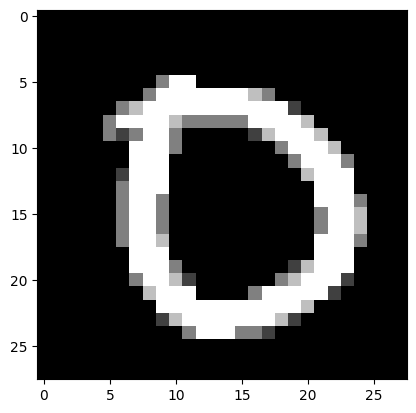

In [95]:
num = 1888
Z1val, A1val, Z2val, A2val = forward_propagation(W1,B1,W2,B2,X_val[:,num,None])
print("predicted_labe: ",get_predictions(A2val))
print("actual_label: ",Y_val[num])

image_array = X_val[:,num].reshape((28,28))
plt.imshow(image_array, cmap='gray')
plt.show()


In [96]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1,B1,W2,B2,X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print(val_acc)


0.868
